# Quantum classification of Iris dataset with 2 labels

In [2]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split

from quantum_classification import *

### Traing with 2 features

In [2]:
data = np.loadtxt("data/iris_classes1and2_scaled.txt")
X = data[:,:2] # use first 2 features
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [3]:
print(X.shape, Y.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 2) (100,)
(80, 2) (80,)
(20, 2) (20,)


In [4]:
# settings
nqubits = X.shape[1]; nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'TPA'; cost_type = 'LOG'
label = f'{embedding_type}, {ansatz_type}'

# optimize
iris = quantum_classifier(x_train, y_train, nqubits, nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

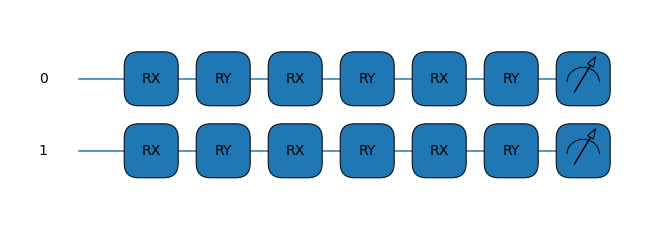

In [5]:
iris.draw_circuit()

In [6]:
iris.optimize()

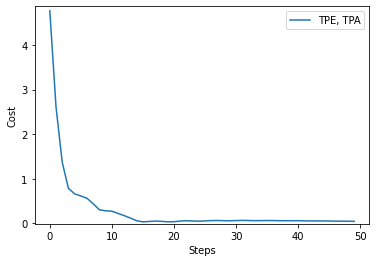

In [7]:
iris.plot_cost()

In [8]:
print('accuracy ', iris.accuracy(x_test, y_test))
print('optimized cost; ', iris.cost_list[-1])

accuracy  1.0
optimized cost;  0.04539091787066694


### Train with 4 features

In [11]:
data = np.loadtxt("data/iris_classes1and2_scaled.txt")
X = data[:,:4] # use first 4 features
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
for i in range(3):
    print(x_train[i], y_train[i])

[0.55 0.95 0.15 0.15] -1.0
[0.25 0.5  0.2  0.  ] -1.0
[0.6 0.2 1.4 0.5] 1.0


In [13]:
# settings
nqubits = X.shape[1]; nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'SEA'; cost_type = 'LOG'
label = f'{embedding_type}, {ansatz_type}'

# optimize
iris = quantum_classifier(x_train, y_train, nqubits, nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

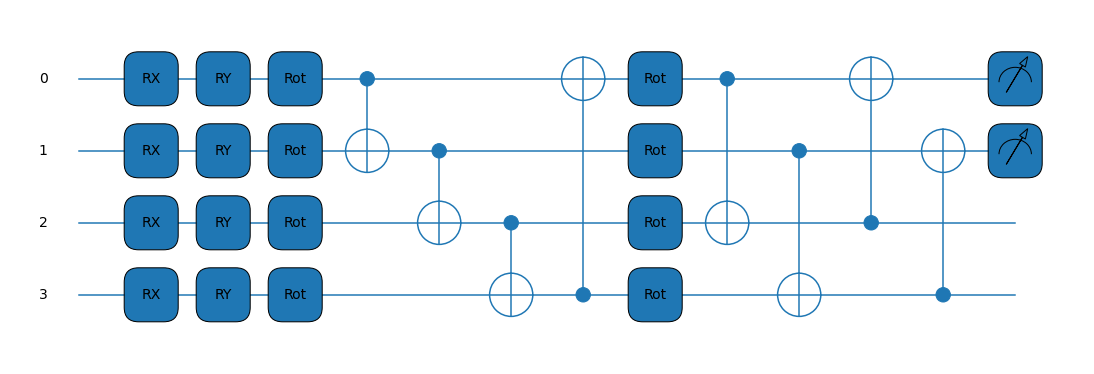

In [14]:
iris.draw_circuit()

In [15]:
iris.optimize()

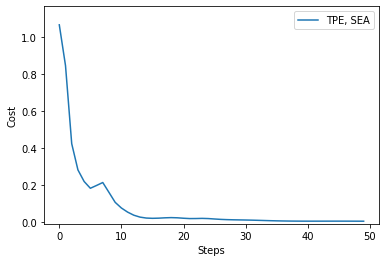

In [16]:
iris.plot_cost()

In [17]:
print('accuracy ', iris.accuracy(x_test, y_test))
print('optimized cost; ', iris.cost_list[-1])

accuracy  1.0
optimized cost;  0.004038181982925655


In [15]:
X = np.random.uniform(-1, 1, (20, 2))
Y = np.random.uniform(-1, 1, (20, 2))

position = list(zip(X, Y))

In [16]:
position

[(tensor([-0.36517155,  0.93820598], requires_grad=True),
  tensor([ 0.35125173, -0.14409417], requires_grad=True)),
 (tensor([ 0.93566098, -0.62233185], requires_grad=True),
  tensor([-0.89638733,  0.44617297], requires_grad=True)),
 (tensor([-0.53185194,  0.93184017], requires_grad=True),
  tensor([-0.37465765, -0.82705742], requires_grad=True)),
 (tensor([ 0.04633711, -0.70384295], requires_grad=True),
  tensor([-0.42693296, -0.16125067], requires_grad=True)),
 (tensor([0.45618325, 0.13660073], requires_grad=True),
  tensor([-0.82927942,  0.70429552], requires_grad=True)),
 (tensor([ 0.29925409, -0.50680113], requires_grad=True),
  tensor([-0.54725418,  0.94741953], requires_grad=True)),
 (tensor([0.87718641, 0.37885704], requires_grad=True),
  tensor([0.48654354, 0.96184343], requires_grad=True)),
 (tensor([0.84955922, 0.92533002], requires_grad=True),
  tensor([-0.43106848, -0.09704378], requires_grad=True)),
 (tensor([-0.42265062,  0.87032965], requires_grad=True),
  tensor([ 0.5

In [28]:
positions

tensor([[-0.90902732,  0.81813829],
        [-0.03172101,  0.72254653],
        [ 0.75451366, -0.48338396],
        [ 0.81378962,  0.99754642],
        [ 0.12865799,  0.0173331 ],
        [-0.41859838,  0.62714202],
        [ 0.58733017, -0.57015177],
        [ 0.45976576,  0.16108888],
        [ 0.92844038,  0.12597857],
        [ 0.94819273, -0.02281458],
        [-0.94723493, -0.59078224],
        [ 0.78962971,  0.49121117],
        [-0.31015416, -0.54420026],
        [-0.29578686, -0.74055862],
        [ 0.55008449, -0.23933138],
        [ 0.83453355, -0.80855838],
        [-0.03384826,  0.44628167],
        [-0.48980038, -0.13647111],
        [ 0.403379  , -0.12382863],
        [ 0.16062695, -0.08544221]], requires_grad=True)

In [38]:
X = np.random.uniform(-1, 1, 20)
Y = np.random.uniform(-1, 1, 20)

positions = np.array(list(zip(X, Y)))
Z = np.zeros(20)

for i,pos in enumerate(positions):
    if pos[0] > 0:
        if pos[1] > 0:
            Z[i] = 0
        else:
            Z[i] = 1
    else:
        if pos[1] > 0:
            Z[i] = 2
        else:
            Z[i] = 3

x_train, x_test, y_train, y_test = train_test_split(positions, Z, test_size=0.3)

# settings
nqubits = 4; nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'SEA'; cost_type = 'LOG'
label = f'{embedding_type}, {ansatz_type}'

# optimize
iris = quantum_classifier(x_train, y_train, nqubits, nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

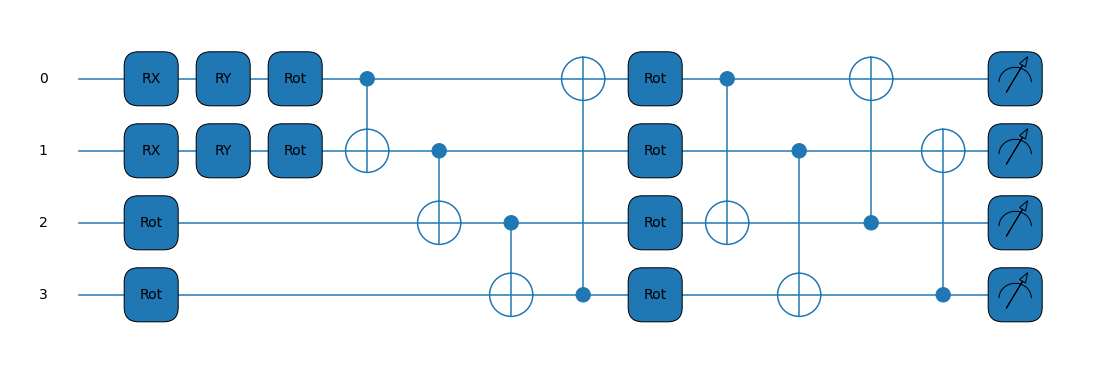

In [39]:
iris.draw_circuit()

In [40]:
iris.optimize()

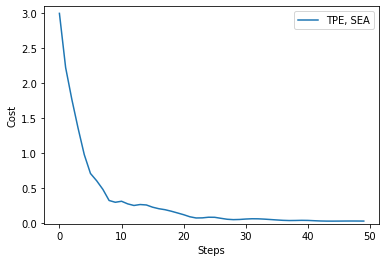

In [41]:
iris.plot_cost()

In [42]:
print('accuracy ', iris.accuracy(x_test, y_test))
print('optimized cost; ', iris.cost_list[-1])

accuracy  0.5
optimized cost;  0.02884360238231695
